In [6]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('3_data.csv',encoding='utf-8')

df1 = df1.dropna()

df1 = df1.reset_index(drop=True)

df1 = df1.drop('id', axis=1)

df1['diagnosis'] = df1['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)#.apply()方法将函数应用于指定位置的每个元素

# Split data
X = df1.drop('diagnosis', axis=1)
le = LabelEncoder()
y = le.fit_transform(df1['diagnosis'])

In [9]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,X,y,cv=10).mean()
score

0.9589285714285716

0.9660714285714285 51


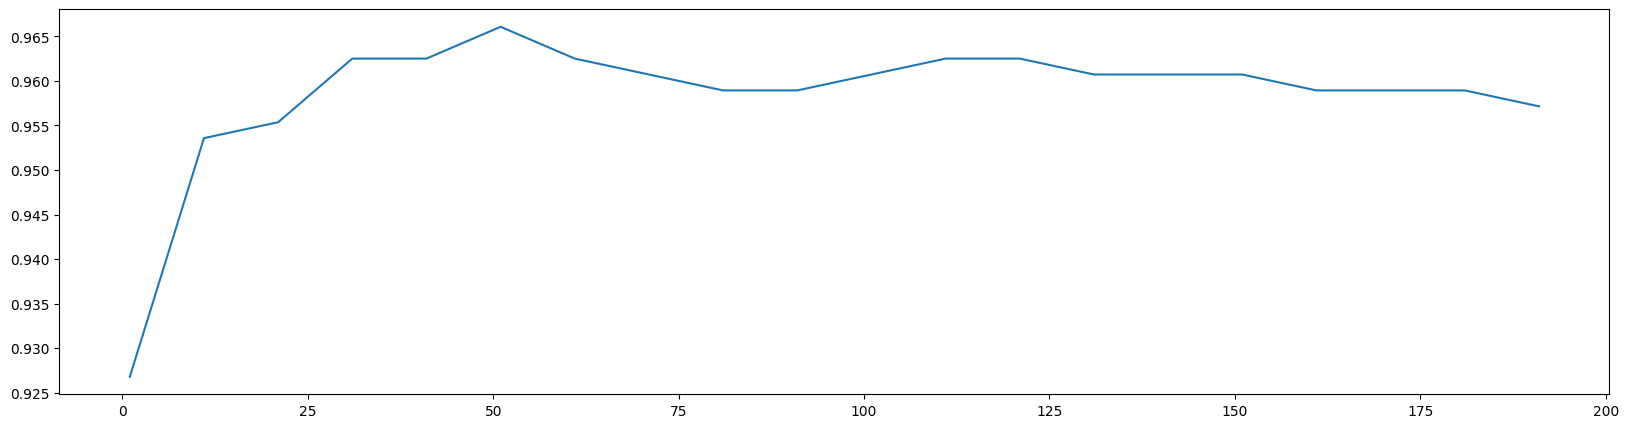

In [4]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.96312656641604 46


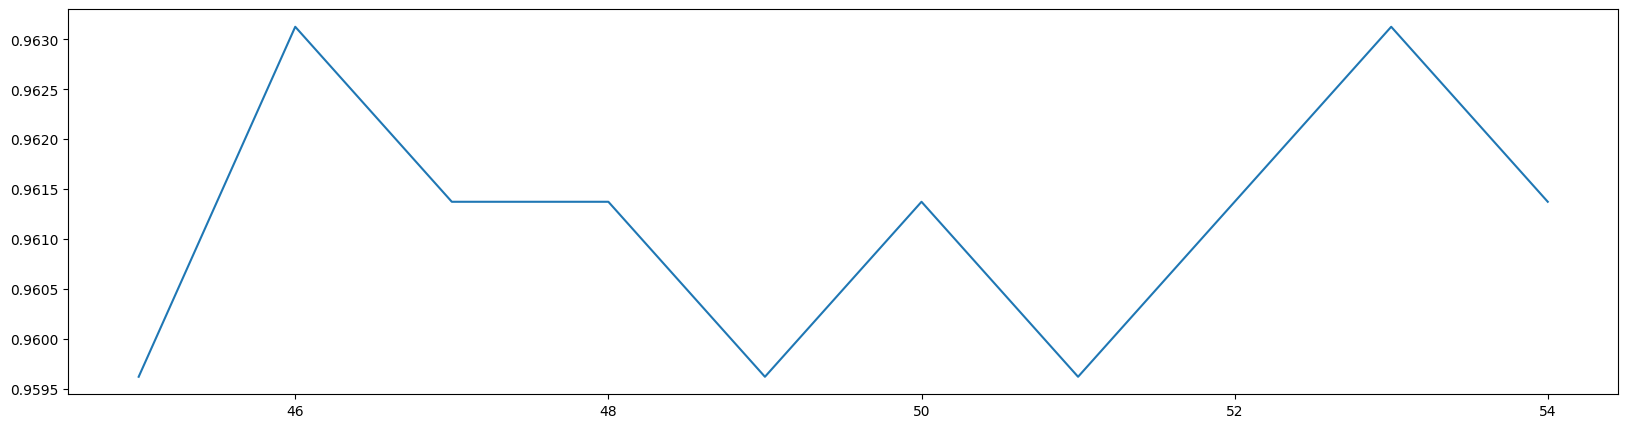

In [6]:
scorel = []
for i in range(45,55):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(45,55)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(45,55),scorel)
plt.show()

In [9]:
#调整max_depth

param_grid = {'max_depth':np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=46,random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GS.best_params_, GS.best_score_

({'max_depth': 7}, 0.9678571428571429)

In [12]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)} 

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GS.best_params_,GS.best_score_

({'max_features': 6}, 0.968421052631579)

In [27]:
param_grid = {
    'n_estimators': range(45, 50),
    'max_depth': np.arange(6, 9, 1),
    'max_features': np.arange(5, 8, 1)
}

rfc = RandomForestClassifier(random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X, y)
print(GS.best_params_, GS.best_score_)

{'max_depth': 7, 'max_features': 5, 'n_estimators': 45} 0.9696428571428571


"\nparam_grid = {'max_features': np.arange(5,30,1)}\nrfc = RandomForestClassifier(n_estimators=39, random_state=90)\nGS = GridSearchCV(rfc, param_grid, cv=10)\nGS.fit(X, y)\nprint(GS.best_params_, GS.best_score_)\n"

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# 创建一个LogisticRegression模型实例
lr = LogisticRegression(random_state=42,max_iter=10000)

# 创建一个GridSearchCV实例
grid_search = GridSearchCV(lr, param_grid, cv=5)

# 使用数据进行拟合
grid_search.fit(X, y)

# 输出最佳参数和最佳分数
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9625


In [26]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 首先，对数据进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化最高得分和最佳主成分数量
best_score_pca = 0
best_n_components_pca = 0

# 使用PCA进行降维，并找到得分最高的主成分数量
for n_components in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    rfc = RandomForestClassifier(n_estimators=100, random_state=90)
    score = cross_val_score(rfc, X_pca, y, cv=10).mean()
    if score > best_score_pca:
        best_score_pca = score
        best_n_components_pca = n_components

print("Best score with PCA: ", best_score_pca)
print("Best number of components with PCA: ", best_n_components_pca)

# 初始化最高得分和最佳主成分数量
best_score_kpca = 0
best_n_components_kpca = 0

# 使用Kernel PCA进行降维，并找到得分最高的主成分数量
for n_components in range(1, X_scaled.shape[1] + 1):
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    X_kpca = kpca.fit_transform(X_scaled)
    rfc = RandomForestClassifier(n_estimators=100, random_state=90)
    score = cross_val_score(rfc, X_kpca, y, cv=10).mean()
    if score > best_score_kpca:
        best_score_kpca = score
        best_n_components_kpca = n_components

print("Best score with Kernel PCA: ", best_score_kpca)
print("Best number of components with Kernel PCA: ", best_n_components_kpca)

Best score with PCA:  0.957142857142857
Best number of components with PCA:  7
Best score with Kernel PCA:  0.9535714285714286
Best number of components with Kernel PCA:  9


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': ['sqrt', 'log2']
}

dtc = DecisionTreeClassifier(random_state=90)
GS = GridSearchCV(dtc, param_grid, cv=10)
GS.fit(X, y)
print(GS.best_params_, GS.best_score_)

{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6} 0.9517857142857142


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 将X和y转换为DataFrame
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['diagnosis'])
#print(X_df)
#print(y_df)

# 将y和X合并为一个新的DataFrame
df_new = pd.concat([y_df, X_df], axis=1)
#print(df_new)
# 计算Pearson相关系数矩阵
correlation_matrix = df_new.corr()
print(correlation_matrix.iloc[0])

diagnosis                  1.000000
radius_mean                0.730408
texture_mean               0.418103
perimeter_mean             0.743260
area_mean                  0.710712
smoothness_mean            0.350557
compactness_mean           0.591914
concavity_mean             0.694092
concave points_mean        0.776918
symmetry_mean              0.328066
fractal_dimension_mean    -0.017349
radius_se                  0.567330
texture_se                 0.001420
perimeter_se               0.555536
area_se                    0.547100
smoothness_se             -0.062163
compactness_se             0.288433
concavity_se               0.253796
concave points_se          0.405533
symmetry_se               -0.003578
fractal_dimension_se       0.078726
radius_worst               0.777670
texture_worst              0.457536
perimeter_worst            0.784240
area_worst                 0.736759
smoothness_worst           0.411896
compactness_worst          0.582315
concavity_worst            0

In [36]:
# 定义要保留的列
columns_to_keep = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

# 将X转换为DataFrame，并只保留特定的列
X_reduce = pd.DataFrame(X, columns=columns_to_keep)

rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,X_reduce,y,cv=10).mean()
score

0.9517857142857142

0.9553571428571429 111


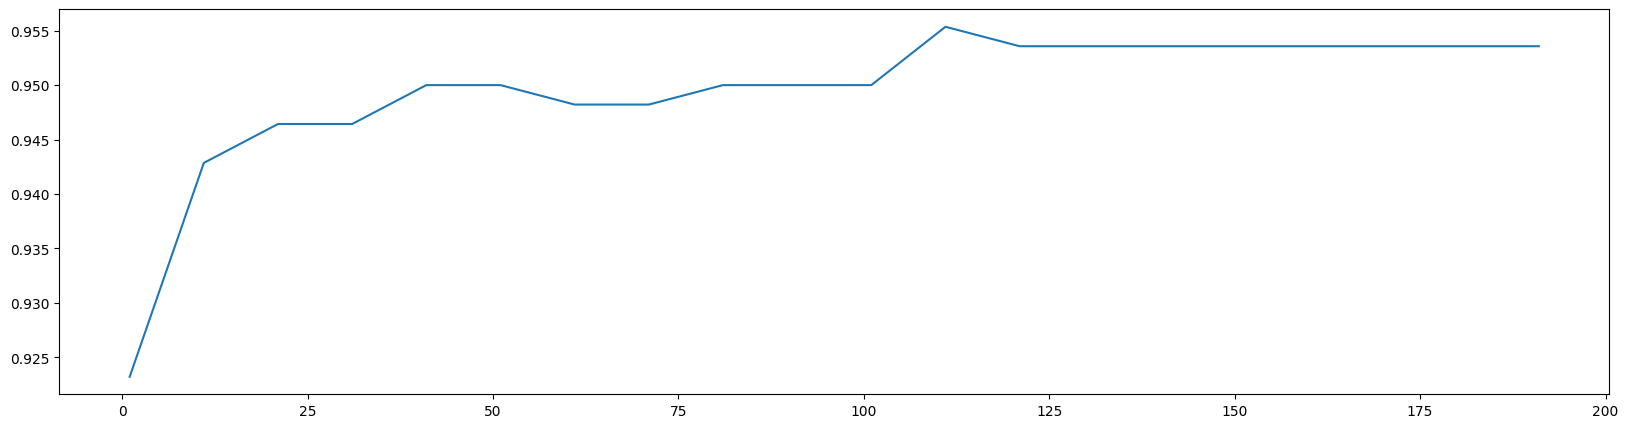

In [37]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_reduce,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

#rf = RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=16, min_samples_split=25, n_estimators=79)
svm = SVC()
dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
    
# 创建集成学习模型
eclf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('dt', dt)], voting='hard')

# 创建k折交叉验证
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# 使用k折交叉验证评估模型
scores = cross_val_score(eclf, X, y, cv=cv)

# 打印模型的平均得分
print('Average score:', scores.mean())

Average score: 0.9535714285714285


In [7]:
# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(y_val, y_pred))
    
    # After tuning parameters on validation set, evaluate on test set
    y_pred_test = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_pred_test))

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.90      0.90      0.90        21

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.96      0.90      0.93        49

    accuracy                           0.94       112
   macro avg       0.94      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.95      0.98        21
